In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
import os, shutil
from sklearn.model_selection import train_test_split

# Set your base path
base_path = '/content/drive/MyDrive/ML'
output_path = '/content/drive/MyDrive/ML_split'

# Create train/ and test/ folders
for split in ['train', 'test']:
    for cls in ['dogs', 'wolves']:
        os.makedirs(os.path.join(output_path, split, cls), exist_ok=True)

# Split each class into train/test and copy
for cls in ['dogs', 'wolves']:
    cls_path = os.path.join(base_path, cls)
    images = os.listdir(cls_path)
    train_imgs, test_imgs = train_test_split(images, test_size=0.2, random_state=42)

    for img in train_imgs:
        shutil.copy(os.path.join(cls_path, img), os.path.join(output_path, 'train', cls))
    for img in test_imgs:
        shutil.copy(os.path.join(cls_path, img), os.path.join(output_path, 'test', cls))

In [6]:
train_dir = '/content/drive/MyDrive/ML_split/train'
test_dir = '/content/drive/MyDrive/ML_split/test'

In [7]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen  = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary'
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary'
)

Found 1600 images belonging to 2 classes.
Found 400 images belonging to 2 classes.


In [31]:
from tensorflow.keras import layers, models

model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    layers.MaxPooling2D(2, 2),

    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),

    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(1, activation='sigmoid')  # binary classification
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [32]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [33]:
history = model.fit(
    train_generator,
    epochs=5,
    validation_data=test_generator
)

Epoch 1/5
50/50 ━━━━━━━━━━━━━━━━━━━━ 84s 2s/step - accuracy: 0.5087 - loss: 1.0899 - val_accuracy: 0.6725 - val_loss: 0.6491
Epoch 2/5
50/50 ━━━━━━━━━━━━━━━━━━━━ 142s 2s/step - accuracy: 0.6730 - loss: 0.6389 - val_accuracy: 0.6925 - val_loss: 0.6240
Epoch 3/5
50/50 ━━━━━━━━━━━━━━━━━━━━ 81s 2s/step - accuracy: 0.7300 - loss: 0.5835 - val_accuracy: 0.6675 - val_loss: 0.5846
Epoch 4/5
50/50 ━━━━━━━━━━━━━━━━━━━━ 81s 2s/step - accuracy: 0.7487 - loss: 0.5209 - val_accuracy: 0.6775 - val_loss: 0.6105
Epoch 5/5
50/50 ━━━━━━━━━━━━━━━━━━━━ 84s 2s/step - accuracy: 0.8477 - loss: 0.3692 - val_accuracy: 0.7200 - val_loss: 0.5690


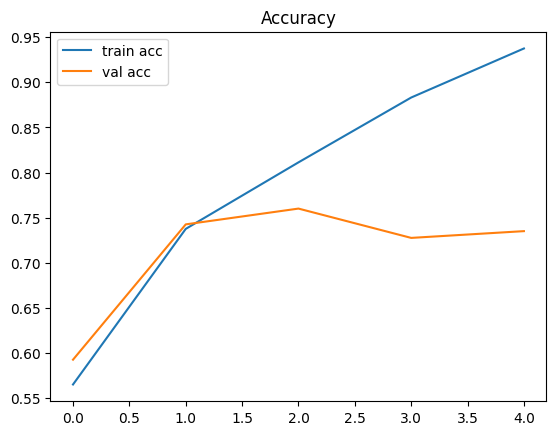

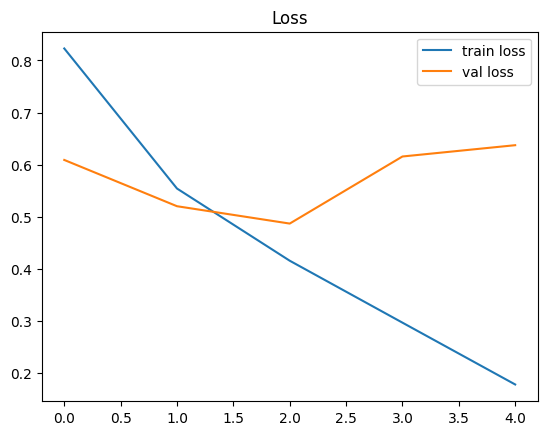

In [11]:
import matplotlib.pyplot as plt

# Accuracy
plt.plot(history.history['accuracy'], label='train acc')
plt.plot(history.history['val_accuracy'], label='val acc')
plt.legend()
plt.title("Accuracy")
plt.show()

# Loss
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.legend()
plt.title("Loss")
plt.show()

In [14]:
loss, accuracy = model.evaluate(test_generator)
print(f"Test Accuracy: {accuracy:.2%}")

13/13 ━━━━━━━━━━━━━━━━━━━━ 8s 569ms/step - accuracy: 0.7226 - loss: 0.6542
Test Accuracy: 73.50%


In [15]:
img_path = '/content/drive/MyDrive/ML_split/test/dogs/n02085620_13964.jpg'

In [23]:
from tensorflow.keras.preprocessing import image
import numpy as np

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 172ms/step


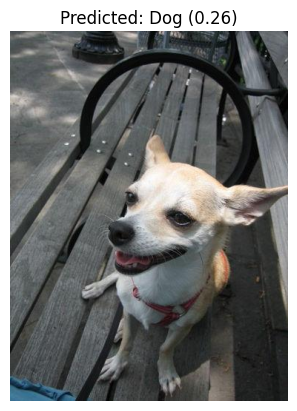

In [24]:
# Load and preprocess
img = image.load_img(img_path, target_size=(150, 150))
img_array = image.img_to_array(img) / 255.0
img_array = np.expand_dims(img_array, axis=0)

# Predict
prediction = model.predict(img_array)[0][0]

# Show result
plt.imshow(image.load_img(img_path))
plt.axis('off')
label = "Wolf" if prediction > 0.5 else "Dog"
plt.title(f"Predicted: {label} ({prediction:.2f})")
plt.show()

In [28]:
history = model.fit(
    train_generator,
    epochs=10,  # Increase to 10
    validation_data=test_generator
)

Epoch 1/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 82s 2s/step - accuracy: 0.5322 - loss: 1.4486 - val_accuracy: 0.6750 - val_loss: 0.6533
Epoch 2/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 80s 2s/step - accuracy: 0.6631 - loss: 0.6295 - val_accuracy: 0.6450 - val_loss: 0.6205
Epoch 3/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 80s 2s/step - accuracy: 0.7207 - loss: 0.5663 - val_accuracy: 0.7025 - val_loss: 0.5824
Epoch 4/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 76s 2s/step - accuracy: 0.7950 - loss: 0.4481 - val_accuracy: 0.6825 - val_loss: 0.6017
Epoch 5/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 75s 2s/step - accuracy: 0.8555 - loss: 0.3325 - val_accuracy: 0.7125 - val_loss: 0.6320
Epoch 6/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 76s 2s/step - accuracy: 0.9223 - loss: 0.2206 - val_accuracy: 0.6900 - val_loss: 0.7608
Epoch 7/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 77s 2s/step - accuracy: 0.9619 - loss: 0.1336 - val_accuracy: 0.6850 - val_loss: 0.9500
Epoch 8/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 80s 2s/step - accuracy: 0.9805 - loss: 0.0710 - val_accuracy: 0.7100 - val_loss:

13/13 ━━━━━━━━━━━━━━━━━━━━ 9s 637ms/step


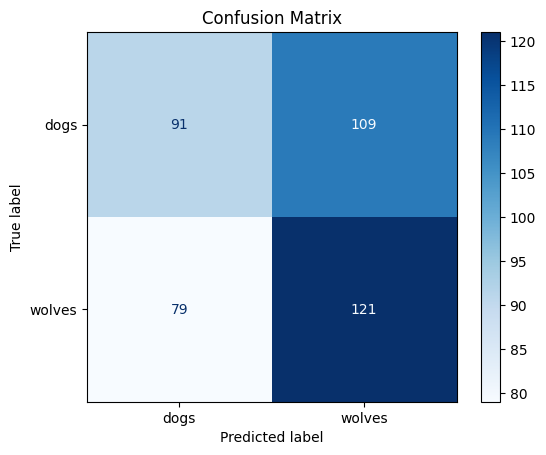

In [34]:
import numpy as np
import matplotlib.pyplot as plt

# Get predictions and true labels
test_generator.reset()
preds = model.predict(test_generator, verbose=1)
pred_labels = (preds > 0.5).astype(int).reshape(-1)
true_labels = test_generator.classes
class_names = list(test_generator.class_indices.keys())

# Plot confusion matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(true_labels, pred_labels)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix")
plt.show()